The point of this notebook: to demonstrate how one can use GPy to predict a 1D
function of a 1D input.

In [2]:
import numpy as np
import pylab as pb
import GPy

pb.ion()

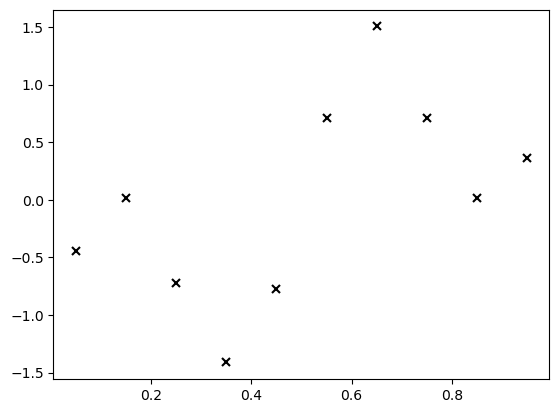

In [10]:
X = np.linspace(0.05,0.95,10)[:,None]
Y = -np.cos(np.pi*X) +np.sin(4*np.pi*X) + np.random.randn(10,1)*0.05
pb.figure()
pb.plot(X,Y,'kx',mew=1.5)

In [11]:
k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
m = GPy.models.GPRegression(X,Y,k)

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f2ea518bcd0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f2ea4d759d0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f2ea4d75be0>]}

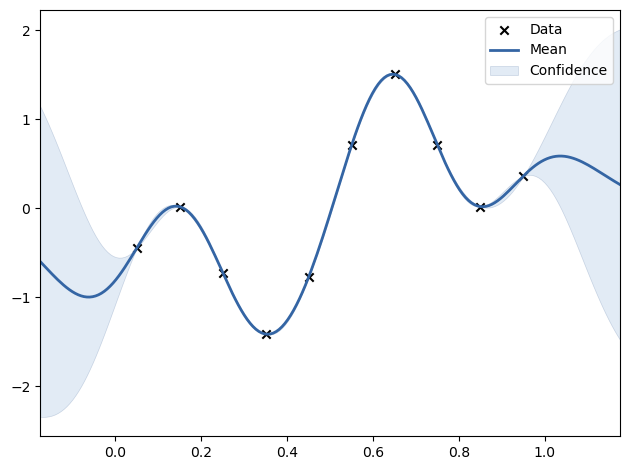

In [12]:
m.constrain_positive('') # '' is a regex matching all parameter names
m.optimize()
m.plot()

In [27]:
m.predict(x)

(array([[-1.25987623]]), array([[5.49430339e-05]]))

In [23]:
X

array([[0.05],
       [0.15],
       [0.25],
       [0.35],
       [0.45],
       [0.55],
       [0.65],
       [0.75],
       [0.85],
       [0.95]])

In [28]:
m.predict(X)

(array([[-0.44461535],
        [ 0.01773381],
        [-0.72250031],
        [-1.41297431],
        [-0.77280558],
        [ 0.70717991],
        [ 1.50425714],
        [ 0.70917967],
        [ 0.0192352 ],
        [ 0.36268245]]),
 array([[3.40944510e-08],
        [3.40944364e-08],
        [3.40944144e-08],
        [3.40943949e-08],
        [3.40943840e-08],
        [3.40943840e-08],
        [3.40943949e-08],
        [3.40944142e-08],
        [3.40944362e-08],
        [3.40944504e-08]]))

In [26]:
x = np.array([np.array([0.4])])
x

array([[0.4]])